In [ ]:
!pip install plantcv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.9/285.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
import sys, traceback
import cv2
import os
import re
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv

In [ ]:
mask_type_is_b = True
treshold = 160

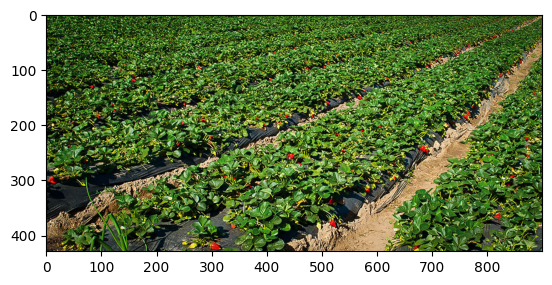

(429, 900, 3)


In [ ]:
pcv.params.debug="plot" #set debug mode
img, path, filename = pcv.readimage("/content/strawberry-field-growing.jpg")


img_size = img.shape

print(img_size)

if np.average(img) < 50:
  pcv.fatal_error("Night Image")
else:
  pass


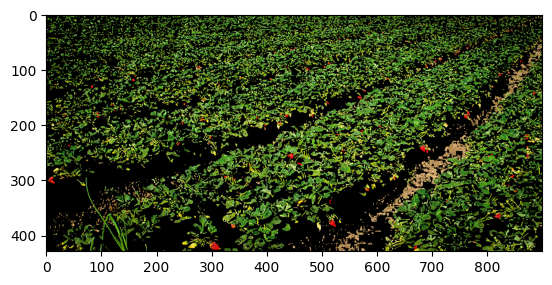

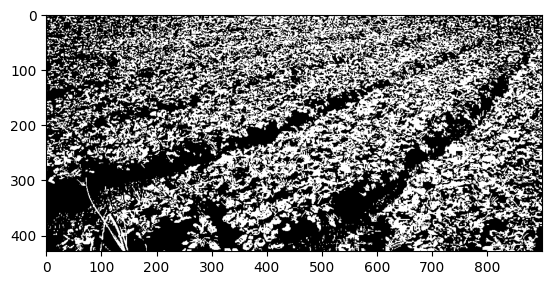

In [ ]:
if mask_type_is_b:
  mask, masked_img = pcv.threshold.custom_range(img=img, lower_thresh=[0,0,treshold],
                                              upper_thresh=[255,255,255], channel='LAB')
else:
  mask, masked_img = pcv.threshold.custom_range(img=img, lower_thresh=[treshold,0,0],
                                              upper_thresh=[255,255,255], channel='LAB')

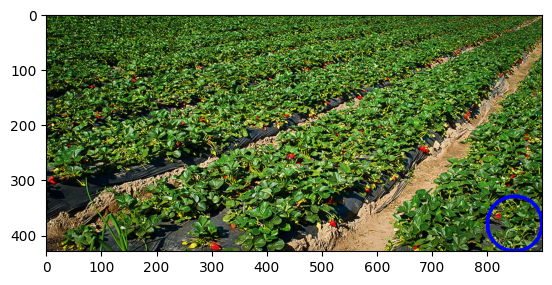

In [ ]:
rois, roi_hierarchy = pcv.roi.circle(img, x=(img_size[1] - 50), y=(img_size[0] - 50),r=50)

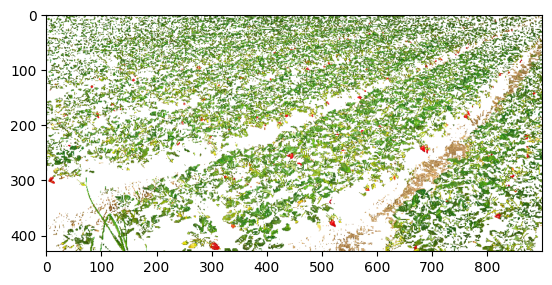

In [ ]:
masked = pcv.apply_mask(img=img, mask=mask, mask_color='white')

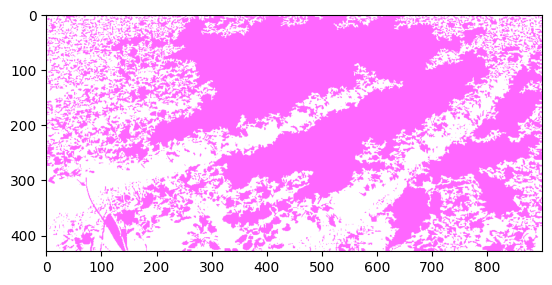

In [ ]:
id_objects, obj_hierarchy = pcv.find_objects(img=masked,mask=mask)

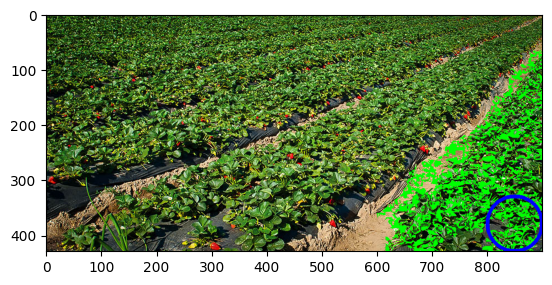

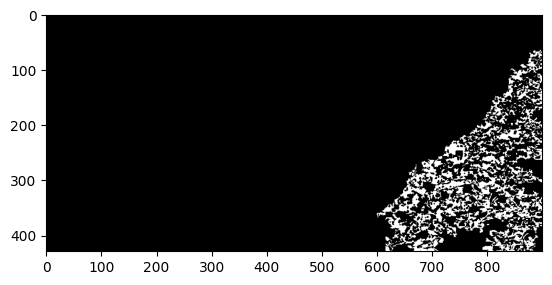

In [ ]:
roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img, rois, roi_hierarchy,
                                                              id_objects, obj_hierarchy, 'partial')

In [ ]:
pcv.print_image(img=kept_mask, filename='/content/production_files/mask.png')

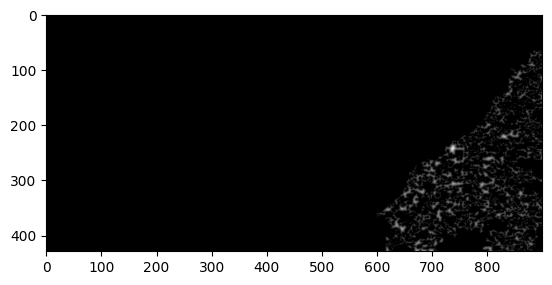

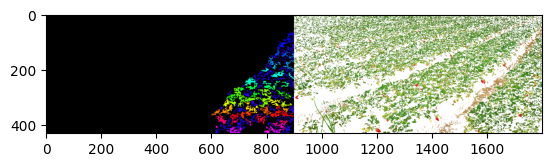

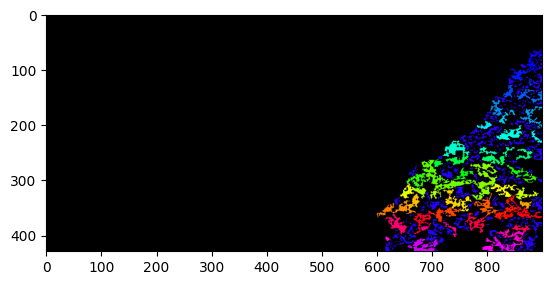

In [ ]:
analysis_images = pcv.watershed_segmentation(rgb_img=masked, mask=kept_mask, distance=15, label="")

height, width, channels = analysis_images.shape
analysis_images = analysis_images[0:height,0:int(width/2)]

pcv.print_image(img=analysis_images, filename='/content/production_files/mask.png')
pcv.plot_image(analysis_images)

In [ ]:
# threshold on the specified color
lower=np.array([0,0,240])
upper=np.array([30,30,255])
mask = cv2.inRange(analysis_images, lower, upper)

# change all non-specified color to white
result = analysis_images.copy()
result[mask!=255] = (0, 0, 0)

# save results

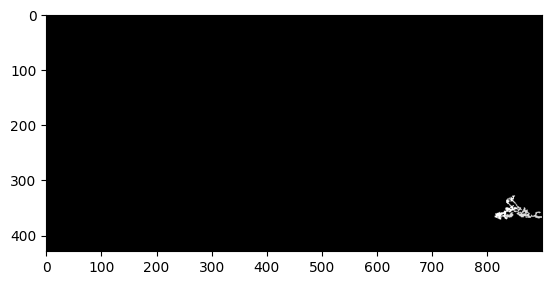

In [ ]:
img = result
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray_mask_r = pcv.rgb2gray(rgb_img=img)

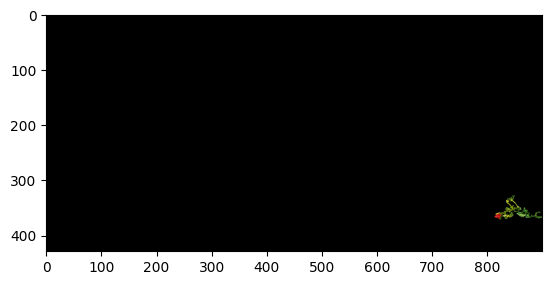

In [ ]:
masked_final = pcv.apply_mask(img=masked_img, mask=gray_mask_r, mask_color="black")

In [ ]:
cv2.imwrite(img=masked_final,filename="/content/production_files/full.png")

True

(429, 900, 3)


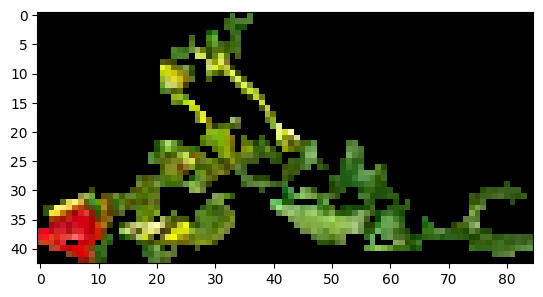

True

In [ ]:
print(masked_final.shape)

list_y,list_x = [],[]

for i in range(len(masked_final)):
  for j in range(len(masked_final[i])):
    if (masked_final[i][j] != [0,0,0]).any():
      list_y.append(i)
      list_x.append(j)

list_y = np.array(list_y)
list_x = np.array(list_x)

y1 = np.amin(list_y)
x1 = np.amin(list_x)
y2 = np.max(list_y)
x2 = np.max(list_x)

if x2 - x1 > 100:#top handle bugs in vision
  x2 = x1 + 100

height, width, channels = masked_final.shape
pcv.plot_image(masked_final[y1:y2,x1:x2])
cv2.imwrite(img=masked_final[y1:y2,x1:x2],filename='/content/production_files/cut_final.png')